In [1]:
print("hello World")

hello World


In [6]:
import kagglehub

# Download latest version
# path = kagglehub.dataset_download("blastchar/telco-customer-churn")
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/versions/1
Please make sure you specified the correct resource identifiers.

In [22]:
import requests
import zipfile
import os

# Function to download a file
def download_file(url, output_path):
    response = requests.get(url, stream=True)
    with open(output_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print(f"Downloaded file to {output_path}")

# Function to unzip a file
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Unzipped file to {extract_to}")

def delete_zipfile(zip_file_path):
    os.remove(zip_file_path)
    print(f"Deleted downloaded zip file: {zip_file_path}")

# URL of the zip file
url = "https://www.kaggle.com/api/v1/datasets/download/blastchar/telco-customer-churn"
zip_file_path = os.path.abspath("../data/raw/dataset.zip")
extracted_folder = os.path.abspath("../data/raw/")
dataset_original_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Ensure the extracted folder exists
os.makedirs(extracted_folder, exist_ok=True)

# Download and unzip the file
download_file(url, zip_file_path)
unzip_file(zip_file_path, extracted_folder)
delete_zipfile(zip_file_path)

Downloaded file to d:\mlops-workflow-1\data\raw\dataset.zip
Unzipped file to d:\mlops-workflow-1\data\raw
Deleted downloaded zip file: d:\mlops-workflow-1\data\raw\dataset.zip


In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("../data/raw/raw.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df1 = df.copy(deep=True)

In [29]:
# Converting DataFrame column elements from string to float using the following code line :
# data['TotalCharges'] = data['TotalCharges'].astype(float)

l1 = [len(i.split()) for i in df1['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    df1.loc[i,'TotalCharges'] = df1.loc[(i-1),'TotalCharges']
    
df1['TotalCharges'] = df1['TotalCharges'].astype(float)
df1.drop(columns = ['customerID'], inplace = True)


Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
text_data_features = [i for i in list(df1.columns) if i not in list(df1.describe().columns)]
print(text_data_features)
print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

1

In [32]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1


In [74]:
df1.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int32  
 5   OnlineBackup      7043 non-null   int32  
 6   DeviceProtection  7043 non-null   int32  
 7   TechSupport       7043 non-null   int32  
 8   Contract          7043 non-null   int32  
 9   PaperlessBilling  7043 non-null   int32  
 10  PaymentMethod     7043 non-null   int32  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 495.3 KB


In [48]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [76]:
over = SMOTE(sampling_strategy = 1)

train, test = train_test_split(df1, test_size=.2, random_state=2)

train_x = train.iloc[:,:13].values
train_y = train.iloc[:,13].values

test_x = test.iloc[:,:13].values
test_y = test.iloc[:,13].values

f1, t1 = over.fit_resample(train_x, train_y)
Counter(t1)

Counter({1: 4113, 0: 4113})

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [53]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [54]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  93.79%
ROC_AUC Score :  73.43%


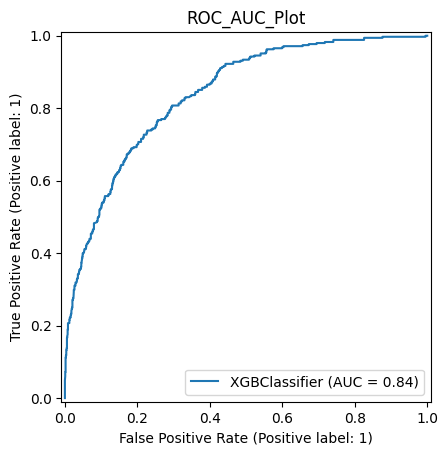

In [55]:
# model(classifier_xgb,x_train,y_train,x_test,y_test)
model(classifier_xgb, f1, t1, test_x, test_y)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1040
           1       0.85      0.86      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



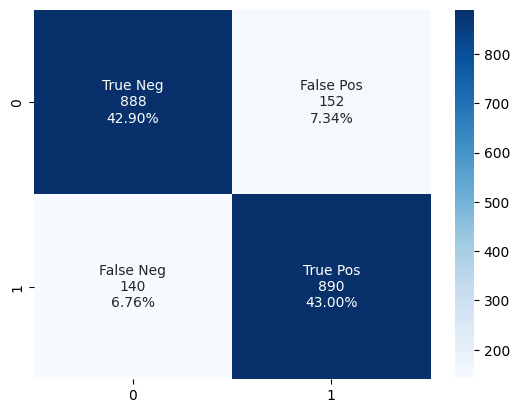

In [56]:
model_evaluation(classifier_xgb,x_test,y_test)

In [73]:
len(pd.concat([train['TotalCharges'], test['TotalCharges']], axis=0).unique())

6530